<a href="https://colab.research.google.com/github/Shalini3110/Shalini/blob/master/finalcrosscnngnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric

!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 736.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
--2025-03-20 13:39:31--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.112, 52.219.156.79, 3.5.208.209, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  14.5MB/s    in 24s     

2025-03-20 13:39:56 (6.25 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
import cv2


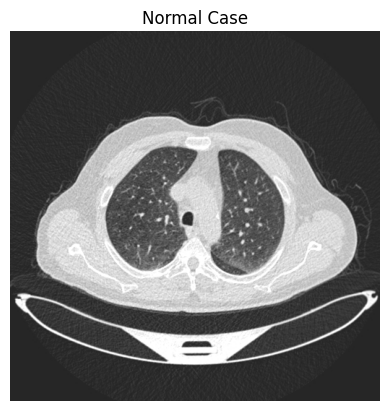

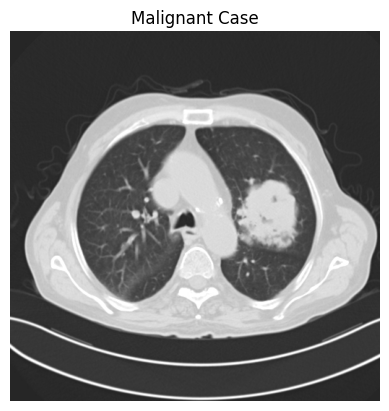

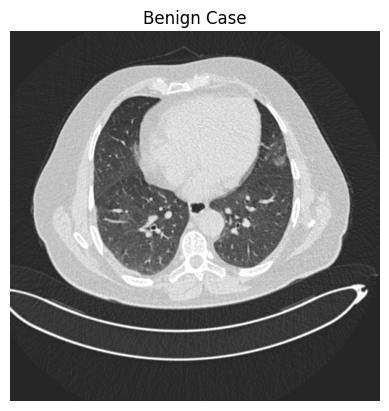

In [ ]:
# Display sample images
def display_sample_image(path, title):
    img = cv2.imread(path)
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')
    plt.show()

display_sample_image("Lung_cancer_dataset/Train/Normal cases/Normal case (3).jpg", "Normal Case")
display_sample_image("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg", "Malignant Case")
display_sample_image("Lung_cancer_dataset/Train/Benign cases/Bengin case (24).jpg","Benign Case")

# Set image dimensions
img_width, img_height = 50,50

# Image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])





In [ ]:
# Load dataset
train_dataset = ImageFolder(root="Lung_cancer_dataset/Train", transform=transform)
test_dataset = ImageFolder(root="Lung_cancer_dataset/Test", transform=transform)

# Print class names
print("Classes:", train_dataset.classes)

Classes: ['Benign cases', 'Malignant cases', 'Normal cases']


In [ ]:
# Compute class weights for loss function
class_counts = np.bincount([label for _, label in train_dataset.samples])
class_weights = compute_class_weight('balanced', classes=np.unique(train_dataset.targets), y=train_dataset.targets)
class_weights = torch.tensor(class_weights, dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# CNN Model Definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 3)

    def forward_features(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        return self.fc1(x)

    def forward(self, x):
        x = self.forward_features(x)
        x = self.fc2(x)
        return x

In [ ]:
# GNN Model Definition
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hybrid Model Definition
class HybridModel(nn.Module):
    def __init__(self, cnn, gnn):
        super(HybridModel, self).__init__()
        self.cnn = cnn
        self.gnn = gnn
        self.fc_out = nn.Linear(64, 3)

    def forward(self, x, edge_index):
        x = self.cnn.forward_features(x)
        x = self.gnn(x, edge_+index)
        x = self.fc_out(x)
        return x

 CNN Model...

Fold 1/5
Epoch [1/50], Loss: 44.9207, Accuracy: 63.9954%
Epoch [2/50], Loss: 32.7225, Accuracy: 75.4936%
Epoch [3/50], Loss: 25.8910, Accuracy: 81.0685%
Epoch [4/50], Loss: 19.2527, Accuracy: 86.2950%
Epoch [5/50], Loss: 18.7683, Accuracy: 87.4564%
Epoch [6/50], Loss: 14.3649, Accuracy: 89.5470%
Epoch [7/50], Loss: 12.1683, Accuracy: 91.7538%
Epoch [8/50], Loss: 11.7896, Accuracy: 91.1731%
Epoch [9/50], Loss: 9.7508, Accuracy: 93.3798%
Epoch [10/50], Loss: 8.1660, Accuracy: 95.0058%
Epoch [11/50], Loss: 6.9376, Accuracy: 95.9350%
Epoch [12/50], Loss: 6.5521, Accuracy: 95.4704%
Epoch [13/50], Loss: 8.0413, Accuracy: 93.7282%
Epoch [14/50], Loss: 6.4350, Accuracy: 95.8188%
Epoch [15/50], Loss: 6.2458, Accuracy: 95.4704%
Epoch [16/50], Loss: 5.4486, Accuracy: 96.8641%
Epoch [17/50], Loss: 3.8562, Accuracy: 97.3287%
Epoch [18/50], Loss: 4.1454, Accuracy: 97.9094%
Epoch [19/50], Loss: 3.2530, Accuracy: 98.3740%
Epoch [20/50], Loss: 4.3947, Accuracy: 97.0964%
Epoch [21/50], Lo

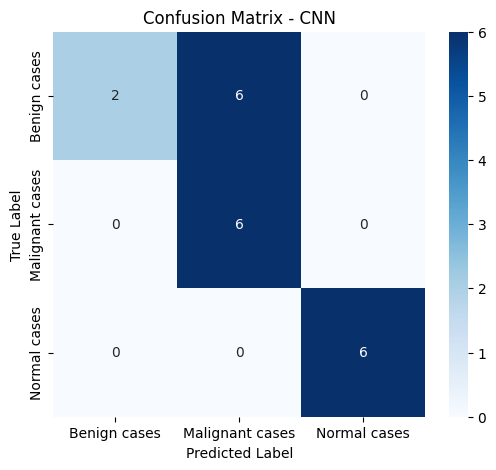

Confusion Matrix for Hybrid Model:
[[3 5 0]
 [0 6 0]
 [0 0 6]]
Classification Report for Hybrid Model:
                 precision    recall  f1-score   support

   Benign cases       1.00      0.38      0.55         8
Malignant cases       0.55      1.00      0.71         6
   Normal cases       1.00      1.00      1.00         6

       accuracy                           0.75        20
      macro avg       0.85      0.79      0.75        20
   weighted avg       0.86      0.75      0.73        20



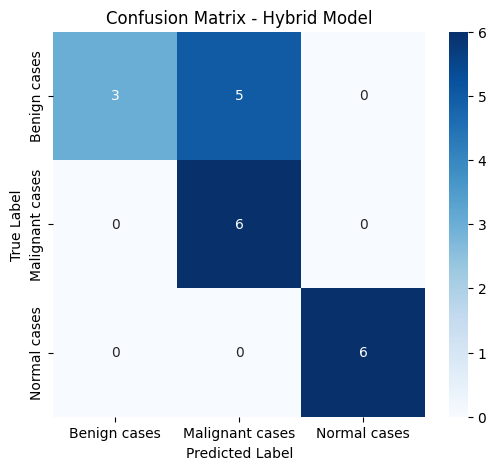

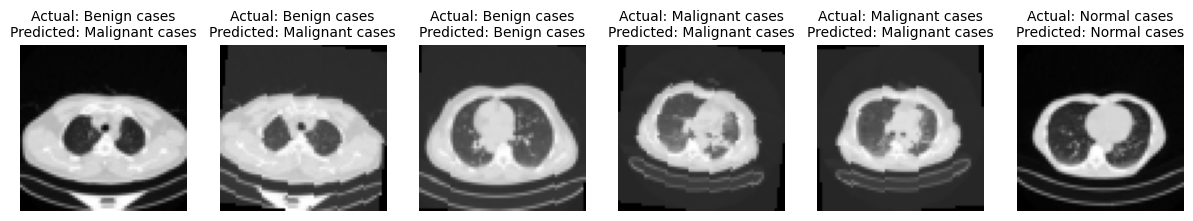

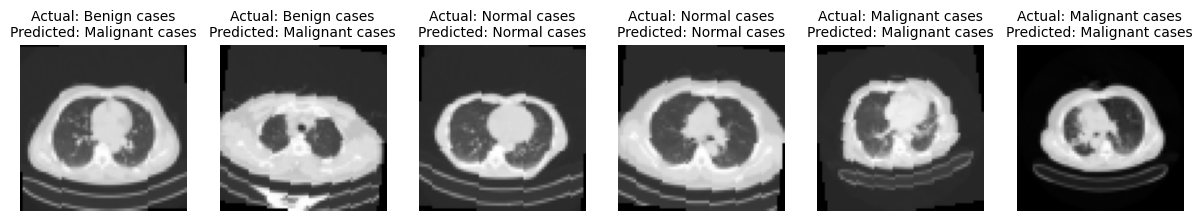

In [ ]:
# Compute edge index function
def compute_edge_index(features, threshold=0.5):
    num_nodes = features.shape[0]
    edge_index = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                sim = F.cosine_similarity(features[i].unsqueeze(0), features[j].unsqueeze(0))
                if sim > threshold:
                    edge_index.append([i, j])
    if edge_index:
        return torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    else:
        edges = [[i, j] for i in range(num_nodes) for j in range(num_nodes) if i != j]
        return torch.tensor(edges, dtype=torch.long).t().contiguous()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Function to visualize correctly classified images
def visualize_correct_predictions(model, dataset, num_samples=6):
    model.eval()
    test_loader = DataLoader(dataset, batch_size=16, shuffle=True)
    correct_images, correct_labels, correct_preds = [], [], []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images) if not isinstance(model, HybridModel) else model(images, compute_edge_index(model.cnn.forward_features(images)))
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                if labels[i] == predicted[i]:
                    correct_images.append(images[i])
                    correct_labels.append(labels[i])
                    correct_preds.append(predicted[i])
                if len(correct_images) >= num_samples:
                    break
            if len(correct_images) >= num_samples:
                break

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        img = correct_images[i].squeeze().cpu().numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"Actual: {dataset.classes[correct_labels[i]]}\nPredicted: {dataset.classes[correct_preds[i]]}", fontsize=10)

    plt.show()

# Cross-validation setup
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Cross-validation function
def cross_validate_model(model, optimizer, dataset, num_epochs=5, model_name="Model"):
    fold_results = []
    criterion = nn.CrossEntropyLoss()

    for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
        print(f"Fold {fold+1}/{num_folds}")

        train_subset = torch.utils.data.Subset(dataset, train_idx)
        val_subset = torch.utils.data.Subset(dataset, val_idx)

        train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

        for epoch in range(num_epochs):
            model.train()
            correct, total, epoch_loss = 0, 0, 0

            for images, labels in train_loader:
                optimizer.zero_grad()

                if isinstance(model, HybridModel):
                    edge_index = compute_edge_index(model.cnn.forward_features(images))
                    outputs = model(images, edge_index)
                else:
                    outputs = model(images)

                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                epoch_loss += loss.item()

            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {100 * correct / total:.4f}%")

        fold_results.append(100 * (correct / total))

    print(f"Average Validation Accuracy: {np.mean(fold_results):.4f}%")
    return fold_results
  # Model evaluation function (includes confusion matrix and classification report)
def evaluate_model(model, dataset, model_name="Model"):
    model.eval()
    test_loader = DataLoader(dataset, batch_size=16, shuffle=False)

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            if isinstance(model, HybridModel):
                edge_index = compute_edge_index(model.cnn.forward_features(images))
                outputs = model(images, edge_index)
            else:
                outputs = model(images)

            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

    # Compute classification report
    report = classification_report(all_labels, all_predictions, target_names=dataset.classes, zero_division=0)
    print(f"Classification Report for {model_name}:")
    print(report)

    # Plot confusion matrix
    plot_confusion_matrix(cm, dataset.classes, title=f"Confusion Matrix - {model_name}")

# Function to visualize actual vs. predicted images
def visualize_results(model, dataset, num_samples=6):
    model.eval()
    test_loader = DataLoader(dataset, batch_size=num_samples, shuffle=True)

    images, labels = next(iter(test_loader))
    outputs = model(images) if not isinstance(model, HybridModel) else model(images, compute_edge_index(model.cnn.forward_features(images)))
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        img = images[i].squeeze().cpu().numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"Actual: {dataset.classes[labels[i]]}\nPredicted: {dataset.classes[predicted[i]]}", fontsize=10)

    plt.show()

# Initialize models
cnn_model = CNN()
gnn_model = GNN(input_dim=128, hidden_dim=64, output_dim=64)
hybrid_model = HybridModel(cnn_model, gnn_model)

optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.0005)
optimizer_hybrid = optim.AdamW(hybrid_model.parameters(), lr=0.0005, weight_decay=0.01)

# Perform cross-validation
# Train models
print(" CNN Model...\n")
cross_validate_model(cnn_model, optimizer_cnn, train_dataset, num_epochs=50, model_name="CNN")

print("\n Hybrid Model...\n")
cross_validate_model(hybrid_model, optimizer_hybrid, train_dataset, num_epochs=50, model_name="Hybrid")

# Evaluate models
evaluate_model(cnn_model, test_dataset, model_name="CNN")
evaluate_model(hybrid_model, test_dataset, model_name="Hybrid Model")

# Show final results
visualize_results(cnn_model, test_dataset)
visualize_results(hybrid_model, test_dataset)
